<h1>Sklearn</h1>
<br>
O sklearn é uma das principais bibliotecas para aprendizagem de máquinas em Python. Os algorítmos mais populares possuem implementações nessa biblioteca, com excessão de técnicas que envolvam <i>Deep Learning</i>. Para tal, utilize bibliotecas como o <b>Tensorflow</b> ou <b>Pytorch</b>

In [125]:
# -*- coding: utf-8 -*-

<h2>Base de dados de teste</h2>
<br>
Para fins de teste, usaremos alguns conjuntos de dados teste que já estão disponíveis no sklearn. Inicialmente usaremos o iris dataset, que contém dados para a classificação de flores.
<br>
<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/4/41/Iris_versicolor_3.jpg/1920px-Iris_versicolor_3.jpg" height="500" width="500">
<i>Fonte da imagem: Wikipedia: https://upload.wikimedia.org/wikipedia/commons/thumb/4/41/Iris_versicolor_3.jpg/1920px-Iris_versicolor_3.jpg</i>

In [126]:
from sklearn import datasets
import numpy as np

iris = datasets.load_iris()
X = iris.data
Y = iris.target

print('SHAPE X', np.shape(X))
print('SHAPE Y', np.shape(Y))

tag_set = set(Y)
print('TAG SET', tag_set)

SHAPE X (150, 4)
SHAPE Y (150,)
TAG SET {0, 1, 2}


<h2>Criando conjuntos de treinamento, teste e validação</h2>

In [127]:
from sklearn.model_selection import train_test_split


X_train_initial, X_test, Y_train_initial, Y_test = train_test_split(X, Y, 
                                                                    test_size=0.30, 
                                                                    stratify=Y,
                                                                    shuffle=True)

print('SHAPE X_train_test', np.shape(X_train_initial))
print('SHAPE X_test', np.shape(X_test))
print('SET Y_train', set(Y_train_initial))
print('SET Y_test', set(Y_test))

X_train, X_validation, Y_train, Y_validation = train_test_split(X_train_initial, Y_train_initial, 
                                                                test_size=0.2, 
                                                                stratify=Y_train_initial,
                                                                shuffle=True)

print('SHAPE train', np.shape(X_train))
print('SHAPE validation', np.shape(X_validation))
print('SHAPE test', np.shape(X_test))

SHAPE X_train_test (105, 4)
SHAPE X_test (45, 4)
SET Y_train {0, 1, 2}
SET Y_test {0, 1, 2}
SHAPE train (84, 4)
SHAPE validation (21, 4)
SHAPE test (45, 4)


<h2>Testando classificadores no conjunto de validação e no conjunto de teste</h2>

In [128]:
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB

model_1 = GaussianNB()
model_1.fit(X_train, Y_train)

model_2 = BernoulliNB()
model_2.fit(X_train, Y_train)

accuracy_validation_1 = model_1.score(X_validation, Y_validation)
accuracy_validation_2 = model_2.score(X_validation, Y_validation)

print('GaussianNB - acuracia no conjunto de validacao', accuracy_validation_1)
print('BernoulliNB - acuracia no conjunto de validacao', accuracy_validation_2)

#Para testar o segundo classificador
#accuracy_validation_2 = 1.0

if accuracy_validation_1 > accuracy_validation_2:
    accuracy_test = model_1.score(X_test, Y_test)
    print('GaussianNB - acuracia no conjunto de teste', accuracy_test)
else:
    accuracy_test = model_2.score(X_test, Y_test)
    print('BernoulliNB - acuracia no conjunto de teste', accuracy_test)

GaussianNB - acuracia no conjunto de validacao 0.9047619047619048
BernoulliNB - acuracia no conjunto de validacao 0.3333333333333333
GaussianNB - acuracia no conjunto de teste 0.9333333333333333


<h2>Construíndo uma curva ROC do classificador</h2>

In [129]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, auc

model_regression = LogisticRegression()

model_regression.fit(X_train, Y_train)

Y_score = model_regression.predict_proba(X_test)

In [130]:
Y_score

array([[8.86217412e-01, 1.13676748e-01, 1.05840801e-04],
       [1.72299429e-02, 6.74114395e-01, 3.08655662e-01],
       [8.75948222e-01, 1.23990271e-01, 6.15071510e-05],
       [1.40800746e-03, 3.97838486e-01, 6.00753506e-01],
       [4.11105589e-03, 2.79392015e-01, 7.16496929e-01],
       [8.89307911e-01, 1.10571395e-01, 1.20694074e-04],
       [2.40891419e-03, 3.32293151e-01, 6.65297935e-01],
       [1.03904029e-02, 2.72082422e-01, 7.17527176e-01],
       [1.49082827e-03, 3.26054979e-01, 6.72454193e-01],
       [8.59615900e-04, 4.55883453e-01, 5.43256931e-01],
       [1.20868325e-02, 7.43095164e-01, 2.44818003e-01],
       [8.88708786e-01, 1.10980716e-01, 3.10497534e-04],
       [2.57463983e-03, 4.11057696e-01, 5.86367664e-01],
       [5.51079672e-03, 2.96384714e-01, 6.98104489e-01],
       [5.00439231e-02, 7.87328684e-01, 1.62627393e-01],
       [1.13673273e-04, 4.49747316e-01, 5.50139011e-01],
       [1.00196968e-03, 1.70975723e-01, 8.28022308e-01],
       [7.85742160e-01, 2.14069

In [131]:
class_to_look = 2
y_score_class = [x[class_to_look] for x in y_score]

fpr, tpr, thresholds = roc_curve([int(y == class_to_look) for y in Y_test], Y_score[:,class_to_look])

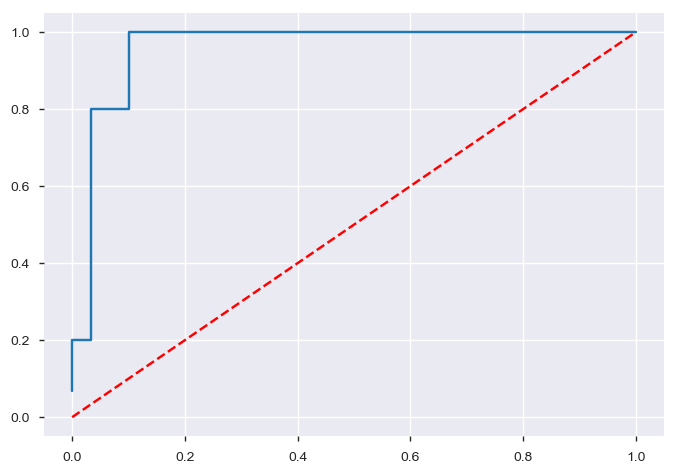

In [132]:
import matplotlib.pyplot as plt
plt.figure()
plt.plot(fpr, tpr)
plt.plot(np.linspace(0.0, 1.0, 10), np.linspace(0.0, 1.0, 10), '--r')
plt.show(block=False)

<h2>Rodando o classificador em um conjunto de exemplos e salvando o modelo</h2>

In [133]:
#Realizando a previsao em um conjunto de dados

prediction = model_1.predict(X_test)
print('Prediction:', prediction[:10], 'vs Target:', Y_test[:10])

Prediction: [0 1 0 2 2 0 2 2 2 1] vs Target: [0 1 0 2 2 0 2 1 2 2]


In [134]:
#Salvando o modelo

#Existem duas formas diferentes

#Salvando....
import pickle
out = open('model_1.pickle', 'wb')
pickle.dump(model_1, out)
out.close()

#Carregando
model_saved = pickle.load(open('model_1.pickle', 'rb'))
prediction = model_saved.predict(X_test)
print('Prediction:', prediction[:10], 'vs Target:', Y_test[:10])

Prediction: [0 1 0 2 2 0 2 2 2 1] vs Target: [0 1 0 2 2 0 2 1 2 2]


In [135]:
#Segunda forma

from sklearn.externals import joblib

#Salvando
joblib.dump(model_1, 'model_1.pkl')

#Carregando
model_saved2 = joblib.load('model_1.pkl')
prediction = model_saved2.predict(X_test)
print('Prediction:', prediction[:10], 'vs Target:', Y_test[:10])

Prediction: [0 1 0 2 2 0 2 2 2 1] vs Target: [0 1 0 2 2 0 2 1 2 2]


<h2>Calculando as demais métricas dos classificadores</h2>

In [136]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix

Y_pred_1 = model_1.predict(X_test)
Y_pred_2 = model_2.predict(X_test)

precision_1 = precision_score(Y_test, Y_pred_1, average=None)
precision_1_average = precision_score(Y_test, Y_pred_1, average='weighted')
print('Precisao do GaussianNB por classe', precision_1)
print('Precisao do GaussianNB na media', precision_1_average)

precision_2 = precision_score(Y_test, Y_pred_2, average=None)
precision_2_average = precision_score(Y_test, Y_pred_2, average='weighted')
print('Precisao do BernoulliNB por classe', precision_2)
print('Precisao do BernoulliNB na media', precision_2_average)

recall_1 = recall_score(Y_test, Y_pred_1, average=None)
recall_1_average = recall_score(Y_test, Y_pred_1, average='weighted')
print('Recall do GaussianNB por classe', recall_1)
print('Recall do GaussianNB na media', recall_1_average)

recall_2 = recall_score(Y_test, Y_pred_2, average=None)
recall_2_average = recall_score(Y_test, Y_pred_2, average='weighted')
print('Recall do BernoulliNB por classe', recall_2)
print('Recall do BernoulliNB na media', recall_2_average)

cm_1 = confusion_matrix(Y_test, Y_pred_1)
print('Matriz de confusao - GaussianNB\n', cm_1)

cm_2 = confusion_matrix(Y_test, Y_pred_2)
print('Matriz de confusao - BernoulliNB\n', cm_2)

Precisao do GaussianNB por classe [1.         0.875      0.92857143]
Precisao do GaussianNB na media 0.9345238095238095


C:\Users\felipe\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Precisao do BernoulliNB por classe [0.33333333 0.         0.        ]
Precisao do BernoulliNB na media 0.1111111111111111
Recall do GaussianNB por classe [1.         0.93333333 0.86666667]
Recall do GaussianNB na media 0.9333333333333333
Recall do BernoulliNB por classe [1. 0. 0.]
Recall do BernoulliNB na media 0.3333333333333333
Matriz de confusao - GaussianNB
 [[15  0  0]
 [ 0 14  1]
 [ 0  2 13]]
Matriz de confusao - BernoulliNB
 [[15  0  0]
 [15  0  0]
 [15  0  0]]


<h1>Atividade: Teste diversos classificadores utilizando o digits dataset</h1>
<br>
<img src="https://upload.wikimedia.org/wikipedia/commons/2/27/MnistExamples.png" height="500" width="500">
<i>Fonte da imagem: Wikipedia: https://upload.wikimedia.org/wikipedia/commons/2/27/MnistExamples.png</i>
<br>
<h4>Pesquisar classificadores aqui:</h4>
<a href="https://scikit-learn.org/stable/supervised_learning.html" target="_blank">Referência do sklearn</a>
    

In [137]:
iris = datasets.load_digits()
X = iris.data
Y = iris.target

print('SHAPE X', np.shape(X))
print('SHAPE Y', np.shape(Y))

tag_set = set(Y)
print('TAG SET', tag_set)


SHAPE X (1797, 64)
SHAPE Y (1797,)
TAG SET {0, 1, 2, 3, 4, 5, 6, 7, 8, 9}


<h2>Normalização de features - Max Min</h2>

In [138]:
from sklearn import datasets
import numpy as np

wine = datasets.load_wine()
X = wine.data
Y = wine.target

print('SHAPE X', np.shape(X))
print('SHAPE Y', np.shape(Y))

tag_set = set(Y)
print('TAG SET', tag_set)

SHAPE X (178, 13)
SHAPE Y (178,)
TAG SET {0, 1, 2}


In [139]:
import pandas as pd
import pandas_profiling

X_df = pd.DataFrame(X, columns=wine.feature_names)
pandas_profiling.ProfileReport(X_df)

Number of variables,13
Number of observations,178
Total Missing (%),0.0%
Total size in memory,18.2 KiB
Average record size in memory,104.4 B
Numeric,13
Categorical,0
Boolean,0
Date,0
Text (Unique),0
Rejected,0


In [140]:
from sklearn.model_selection import train_test_split


X_train_wine, X_test_wine, Y_train_wine, Y_test_wine = train_test_split(X, Y, 
                                                                    test_size=0.30, 
                                                                    stratify=Y,
                                                                    shuffle=True)

In [141]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

X_train_wine_sc = scaler.fit_transform(X_train_wine)
X_test_wine_sc = scaler.transform(X_test_wine)

pd_train = pd.DataFrame(X_train_wine_sc, columns=wine.feature_names)
pd_test = pd.DataFrame(X_test_wine_sc, columns=wine.feature_names)

In [142]:
pandas_profiling.ProfileReport(pd_train)

Number of variables,13
Number of observations,124
Total Missing (%),0.0%
Total size in memory,12.7 KiB
Average record size in memory,104.6 B
Numeric,13
Categorical,0
Boolean,0
Date,0
Text (Unique),0
Rejected,0


In [143]:
pandas_profiling.ProfileReport(pd_test)

Number of variables,13
Number of observations,54
Total Missing (%),0.0%
Total size in memory,5.6 KiB
Average record size in memory,105.5 B
Numeric,13
Categorical,0
Boolean,0
Date,0
Text (Unique),0
Rejected,0


<h2>Normalização de features - Z normalization</h2>

In [144]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_wine_sc = scaler.fit_transform(X_train_wine)
X_test_wine_sc = scaler.transform(X_test_wine)

pd_train = pd.DataFrame(X_train_wine_sc, columns=wine.feature_names)
pd_test = pd.DataFrame(X_test_wine_sc, columns=wine.feature_names)

In [145]:
pandas_profiling.ProfileReport(pd_train)

Number of variables,13
Number of observations,124
Total Missing (%),0.0%
Total size in memory,12.7 KiB
Average record size in memory,104.6 B
Numeric,13
Categorical,0
Boolean,0
Date,0
Text (Unique),0
Rejected,0


<h2>Combinação de classificadores</h2>

In [146]:
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import VotingClassifier

iris = datasets.load_digits()
X = iris.data
Y = iris.target

print('SHAPE X', np.shape(X))
print('SHAPE Y', np.shape(Y))

tag_set = set(Y)
print('TAG SET', tag_set)


X_train, X_test, Y_train, Y_test = train_test_split(X, Y,
                                                    test_size=0.30, 
                                                    stratify=Y,
                                                    shuffle=True)


cl1 = GaussianNB()
cl2 = LogisticRegression()
cl3 = KNeighborsClassifier()

combined_cl = VotingClassifier(estimators=[('cl1', cl1), ('cl2', cl2), ('cl3', cl3)])
                 
combined_cl.fit(X_train, Y_train)
                               
prediction = combined_cl.predict(X_test)

cm = confusion_matrix(Y_test, prediction)
print('Matriz de confusao', cm)

SHAPE X (1797, 64)
SHAPE Y (1797,)
TAG SET {0, 1, 2, 3, 4, 5, 6, 7, 8, 9}


C:\Users\felipe\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Matriz de confusao [[54  0  0  0  0  0  0  0  0  0]
 [ 0 53  0  0  0  0  0  0  1  1]
 [ 0  0 53  0  0  0  0  0  0  0]
 [ 0  0  0 52  0  2  0  0  1  0]
 [ 0  0  0  0 54  0  0  0  0  0]
 [ 0  0  0  0  0 55  0  0  0  0]
 [ 0  0  0  0  0  0 54  0  0  0]
 [ 0  0  0  0  0  0  0 54  0  0]
 [ 0  2  0  0  0  1  0  0 49  0]
 [ 0  3  0  0  0  0  0  1  3 47]]


<h2>Exemplo - bases de dados desbalanceadas</h2>

In [147]:
#Criando uma base de dados desbalanceada artificialmente

iris = datasets.load_digits()
X = iris.data
Y = iris.target

Y = [int(y==3) for y in Y]

X_train, X_test, Y_train, Y_test = train_test_split(X, Y,
                                                    test_size=0.30, 
                                                    stratify=Y,
                                                    shuffle=True)
classifier = GaussianNB()
classifier.fit(X_train, Y_train)

prediction = classifier.predict(X_test)

cm = confusion_matrix(Y_test, prediction)
print('Matriz de confusao', cm)

Matriz de confusao [[367 118]
 [  2  53]]


In [148]:
#Exemplo - undersampling + combining
X_1 = [x for i, x in enumerate(X_train) if Y_train[i] == 1]
X_0 = [x for i, x in enumerate(X_train) if Y_train[i] == 0]

print('Len X_1', len(X_1))
print('Len X_0', len(X_0))
print('Unbalancing factor', len(X_0)/len(X_1))

Len X_1 128
Len X_0 1129
Unbalancing factor 8.8203125


In [149]:
import random

random.shuffle(X_0)

def generate_training_sets(X_0, X_1):
    len_x0 = len(X_0)
    num_per_ts = int(len_x0/8)
    Xs = []
    Ys = []
    
    for i in range(8):
        current_X0 = X_0[i*num_per_ts:(i+1)*num_per_ts]
        current_X = current_X0 + X_1
        current_Y = [0]*len(current_X0) + [1]*len(X_1)
        
        Xs.append(current_X)
        Ys.append(current_Y)
    return Xs, Ys

In [150]:
all_Xs, all_Ys = generate_training_sets(X_0, X_1)

In [151]:
from tqdm import tqdm

classifiers = []

for i, xt in tqdm(enumerate(all_Xs)):
    new_classifier = LogisticRegression()
    new_classifier.fit(xt, all_Ys[i])
    classifiers.append(new_classifier)


8it [00:00, 166.76it/s]


In [152]:
import numpy as np

def make_predictions(X, classifiers):
    predictions = []
    for classif in classifiers:
        new_prediction = classif.predict(X)
        predictions.append(new_prediction)
    stack_predictions = np.vstack(predictions)
    stack_mean = np.mean(stack_predictions, axis=0)
    return [int(sm > 0.5) for sm in stack_mean]

pred = make_predictions(X_test, classifiers)

cm = confusion_matrix(Y_test, pred)

print('Matriz de confusao', cm)

Matriz de confusao [[469  16]
 [  3  52]]


<h2>Escalabilidade no treinamento - minibatches</h2>

In [153]:
#Operador yield

def create_squares_1(my_list):
    squared_list = []
    for elem in my_list:
        squared_list.append(elem ** 2)
    return squared_list

squared_list = create_squares_1([1,2,3,4])

for elem in squared_list:
    print(elem)

1
4
9
16


In [154]:
#Alternativa

def create_squares_1(my_list):
    squared_list = []
    for elem in my_list:
        yield elem ** 2

squared_list_gen = create_squares_1([1,2,3,4])

for elem in squared_list:
    print(elem)

1
4
9
16


<h3>Exemplo de treinamento em minibatch com o digits dataset</h3>

In [155]:
#Carregando o digits dataset
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDClassifier
import numpy as np
import math

iris = datasets.load_digits()
X = iris.data
Y = iris.target

X_train_initial, X_test, Y_train_initial, Y_test = train_test_split(X, Y, 
                                                                    test_size=0.30, 
                                                                    stratify=Y,
                                                                    shuffle=True)

X_train, X_validation, Y_train, Y_validation = train_test_split(X_train_initial, Y_train_initial, 
                                                                test_size=0.2, 
                                                                stratify=Y_train_initial,
                                                                shuffle=True)


In [156]:
#Rodar mais de uma vez

def create_batches(X_set, Y_set, size_batch):
    len_X = np.shape(X_set)[0]
    num_batches = int(math.floor(len_X/size_batch))
    start = 0
    for i in range(num_batches):
        x_batch = X_set[start:start + size_batch]
        y_batch = Y_set[start:start + size_batch]
        start += size_batch
        yield x_batch, y_batch

model = SGDClassifier(loss='hinge')
num_epochs = 3

my_classes = (0,1,2,3,4,5,6,7,8,9)

for epoch in range(num_epochs):
    print('Epoch', epoch, 'of', num_epochs)
    batch_generator = create_batches(X_train, Y_train, 30)
    
    for batch_x, batch_y in batch_generator:
        model.partial_fit(batch_x, batch_y, classes=my_classes)

accuracy_validation = model.score(X_validation, Y_validation)

print('Accuracy', accuracy_validation)

Epoch 0 of 3


C:\Users\felipe\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  if not (0.0 < self.validation_fraction < 1.0):


Epoch 1 of 3
Epoch 2 of 3
Accuracy 0.8809523809523809


<h1>Exemplo de classificação de texto com Sklearn</h1>

In [158]:
import json

raw_file = open('datasets/reviews.json', 'r', encoding='utf-8').read()
as_json = json.loads(raw_file)
num_texts = len(as_json['paper'])

print(num_texts)

172


In [ ]:
#Observando os dados

entries = [j for j in as_json['paper']]
entries[0]

In [ ]:
import numpy as np

texts = [' '.join([x['text'] for x in j['review']]) for j in entries]
classifications = [j['preliminary_decision'] for j in entries]

class_set = list(set(classifications))
print('SET classifications', class_set)

numeric_classifications = [class_set.index(c) for c in classifications]

Y = np.array(numeric_classifications).ravel()

<h3>Criação de features numéricas</h3>

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer_1 = CountVectorizer()
vectorizer_2 = TfidfVectorizer()

X_1 = vectorizer_1.fit_transform(texts)
X_2 = vectorizer_2.fit_transform(texts)

Exemplo

In [ ]:
X_1[0]

In [ ]:
X_1[0].todense()

In [ ]:
np.sum(X_1[0].todense())

<h3>Teste dos classificadores</h3>

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier

X_train_1, X_test_1, Y_train_1, Y_test_1 = train_test_split(X_1, Y, 
                                                    test_size=0.30, 
                                                    stratify=Y,
                                                    shuffle=True,
                                                    random_state=42)

X_train_2, X_test_2, Y_train_2, Y_test_2 = train_test_split(X_2, Y, 
                                                    test_size=0.30, 
                                                    stratify=Y,
                                                    shuffle=True,
                                                    random_state=42)

model1_1 = GaussianNB()
model1_2 = GaussianNB()
model2_1 = LogisticRegression()
model2_2 = LogisticRegression()
model3_1 = MLPClassifier((10,), activation='logistic')
model3_2 = MLPClassifier((10,), activation='logistic')

model1_1.fit(X_train_1.todense(), Y_train_1)
model1_2.fit(X_train_2.todense(), Y_train_2)
model2_1.fit(X_train_1, Y_train_1)
model2_2.fit(X_train_2, Y_train_2)
model3_1.fit(X_train_1, Y_train_1)
model3_2.fit(X_train_2, Y_train_2)

accuracy1_1 = model1_1.score(X_test_1.todense(), Y_test_1)
accuracy1_2 = model1_2.score(X_test_2.todense(), Y_test_2)
accuracy2_1 = model2_1.score(X_test_1, Y_test_1)
accuracy2_2 = model2_2.score(X_test_2, Y_test_2)
accuracy3_1 = model3_1.score(X_test_1, Y_test_1)
accuracy3_2 = model3_2.score(X_test_2, Y_test_2)

print('Accuracy GaussianNB + CountVectorizer', accuracy1_1)
print('Accuracy GaussianNB + Tfidf', accuracy1_2)
print('Accuracy LogisticRegression + CountVectorizer', accuracy2_1)
print('Accuracy LogisticRegression + Tfidf', accuracy2_2)
print('Accuracy MLPClassifier + CountVectorizer', accuracy3_1)
print('Accuracy MLPClassifier + Tfidf', accuracy3_2)

<h1>Atividade: Crie um classificador para diferenciar pessoas fisicas ou juridicas</h1>

In [ ]:
import pickle

corpus = pickle.load(open('datasets/name_company_corpus.pickle', 'rb'))

names = [x[0] for x in corpus if x[1] == 'NAME']
companies = [x[0] for x in corpus if x[1] == 'COMPANY']

all_texts = names + companies
labels = [0]*(len(names)) + [1]*(len(companies))
print('NUM PEOPLE', len(names))
print('NUM COMPANIES', len(companies))